Reviews: [4.6, 4.7, 4.6, 4.7, 4.5, 4.3, 4.8]
Average Rating: 4.6


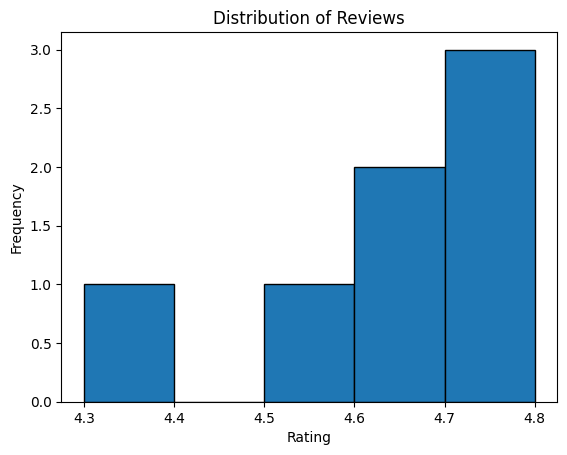

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt

# Path to ChromeDriver
service = Service('D:\\Test Projects\\24 chicken imus analysis\\chromedriver-win64\\chromedriver.exe')

# Initialize WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Optional: Run in headless mode
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # Open the Google Maps page for 24 Chicken Imus
    url = "https://www.google.com/maps/place/24+Chicken+Imus/@14.3764329,120.6344087,51403m/data=!3m1!1e3!4m10!1m2!2m1!1s24+chicken+reviews+maps!3m6!1s0x3397d368dcdfa4bb:0x89ea1b9db358756f!8m2!3d14.3764329!4d120.9392793!15sChcyNCBjaGlja2VuIHJldmlld3MgbWFwcyIFOAGIAQFaDCIKMjQgY2hpY2tlbpIBEmNoaWNrZW5fcmVzdGF1cmFudOABAA!16s%2Fg%2F11kqb_s409?entry=ttu&g_ep=EgoyMDI0MDgyOC4wIKXMDSoASAFQAw%3D%3D"
    driver.get(url)

    # Wait for reviews to load
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'span.MW4etd')))

    # Extract reviews
    reviews = driver.find_elements(By.CSS_SELECTOR, 'span.MW4etd')  # Adjust the selector based on actual page structure
    review_scores = [float(review.text) for review in reviews]

    # Print review scores
    print("Reviews:", review_scores)

    # Calculate average rating
    average_rating = sum(review_scores) / len(review_scores)
    print(f"Average Rating: {average_rating:.1f}")

    # Plotting the ratings
    plt.hist(review_scores, bins=5, edgecolor='black')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Reviews')
    plt.show()

finally:
    # Close the WebDriver
    driver.quit()
